In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Iris

## Get train and test

In [3]:
from functions import preprocess_iris, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_iris()

## Baseline Learning Curve

In [6]:
estimator = KNeighborsClassifier()

train wall clock: 0.0003319263458251953
test wall clock: 0.0021867752075195312
train roc auc:  0.9978124999999999
test roc auc: 1.0


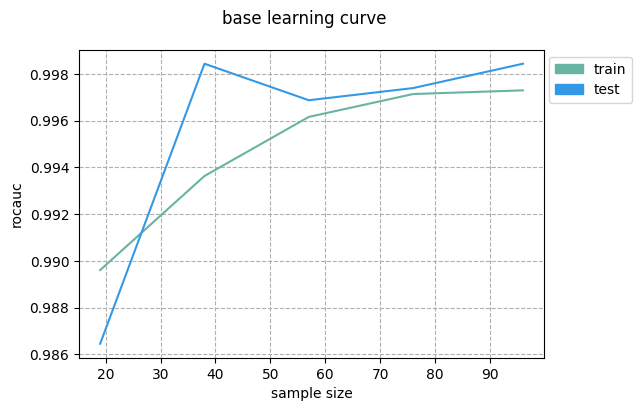

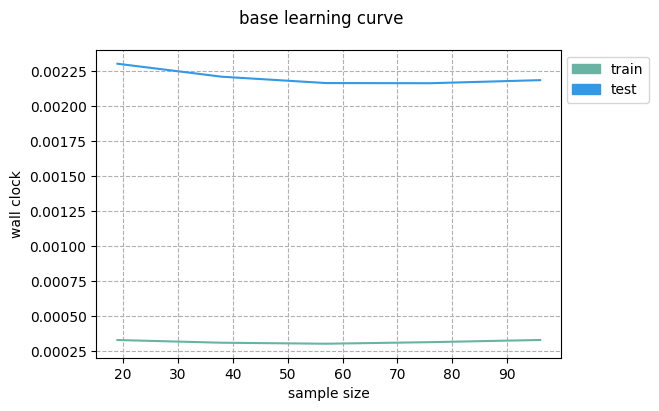

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc_ovo")

## Validation Curve

### algorithm

In [8]:
params = ["ball_tree", "kd_tree", "brute"]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm=param)
    estimators.append(estimator)

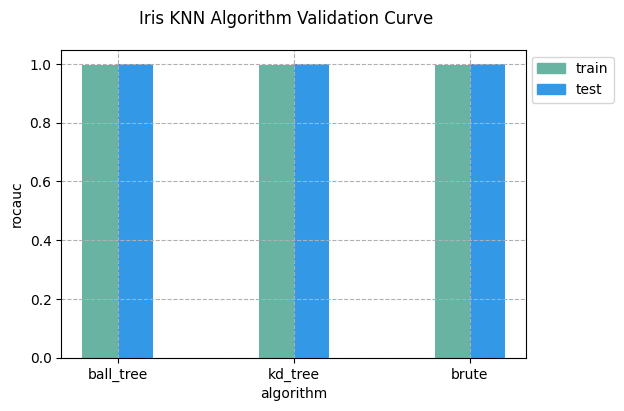

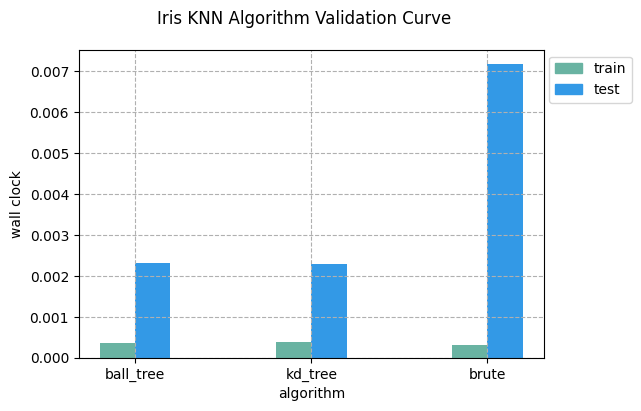

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "algorithm", "Iris KNN Algorithm Validation Curve",'bar',"roc_auc_ovo")

### # of K

In [10]:
params = [1,2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=param)
    estimators.append(estimator)

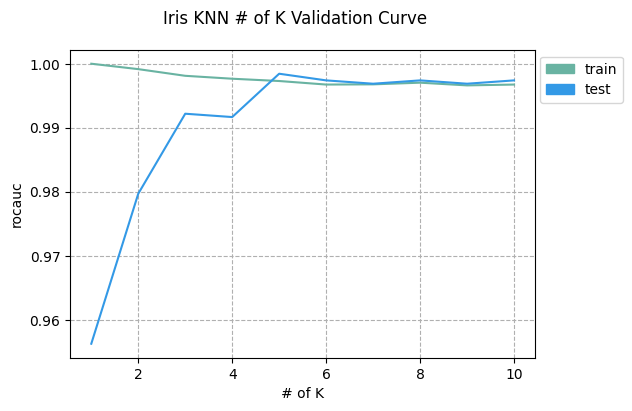

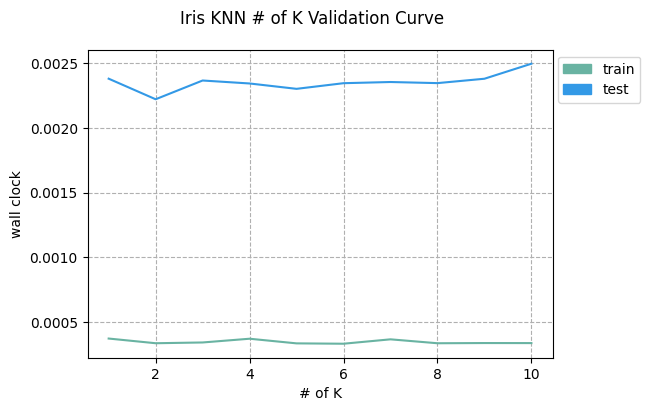

In [11]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "# of K", "Iris KNN # of K Validation Curve",'line',"roc_auc_ovo")

### Weight

In [12]:
params = ["uniform", "distance"]
estimators = []
for param in params:
    estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=5, weights=param)
    estimators.append(estimator)

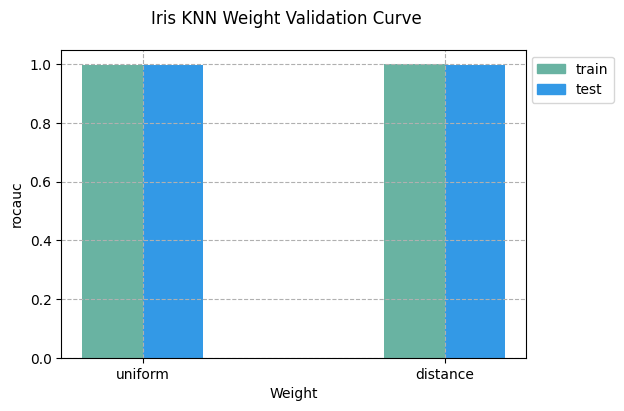

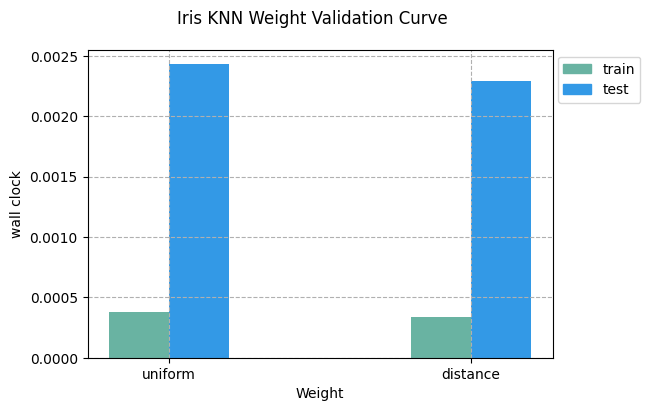

In [13]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Weight", "Iris KNN Weight Validation Curve",'bar',"roc_auc_ovo")

In [14]:
from functions import trigger_validate

### Validation - KNN Optimal Hyperparam

train wall clock: 0.0003459453582763672
test wall clock: 0.0028196334838867187
train roc auc:  1.0
test roc auc: 1.0


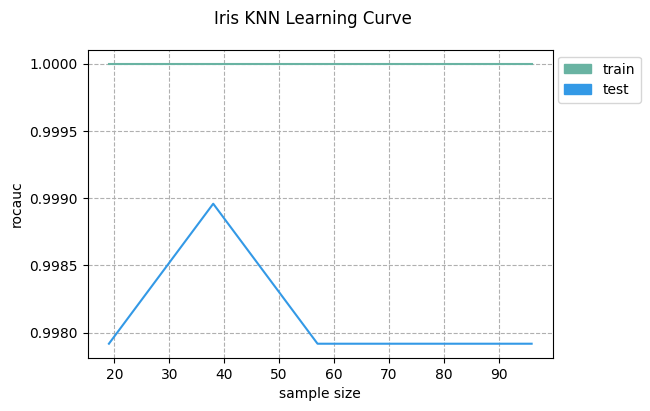

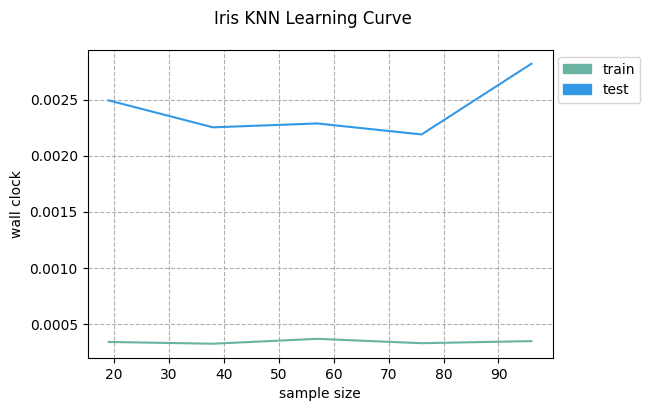

In [15]:
estimator = KNeighborsClassifier(algorithm="kd_tree", n_neighbors=5, weights="distance")
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Iris KNN Learning Curve", "roc_auc_ovo")